Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

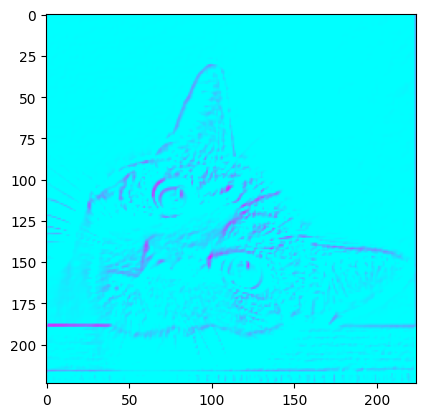

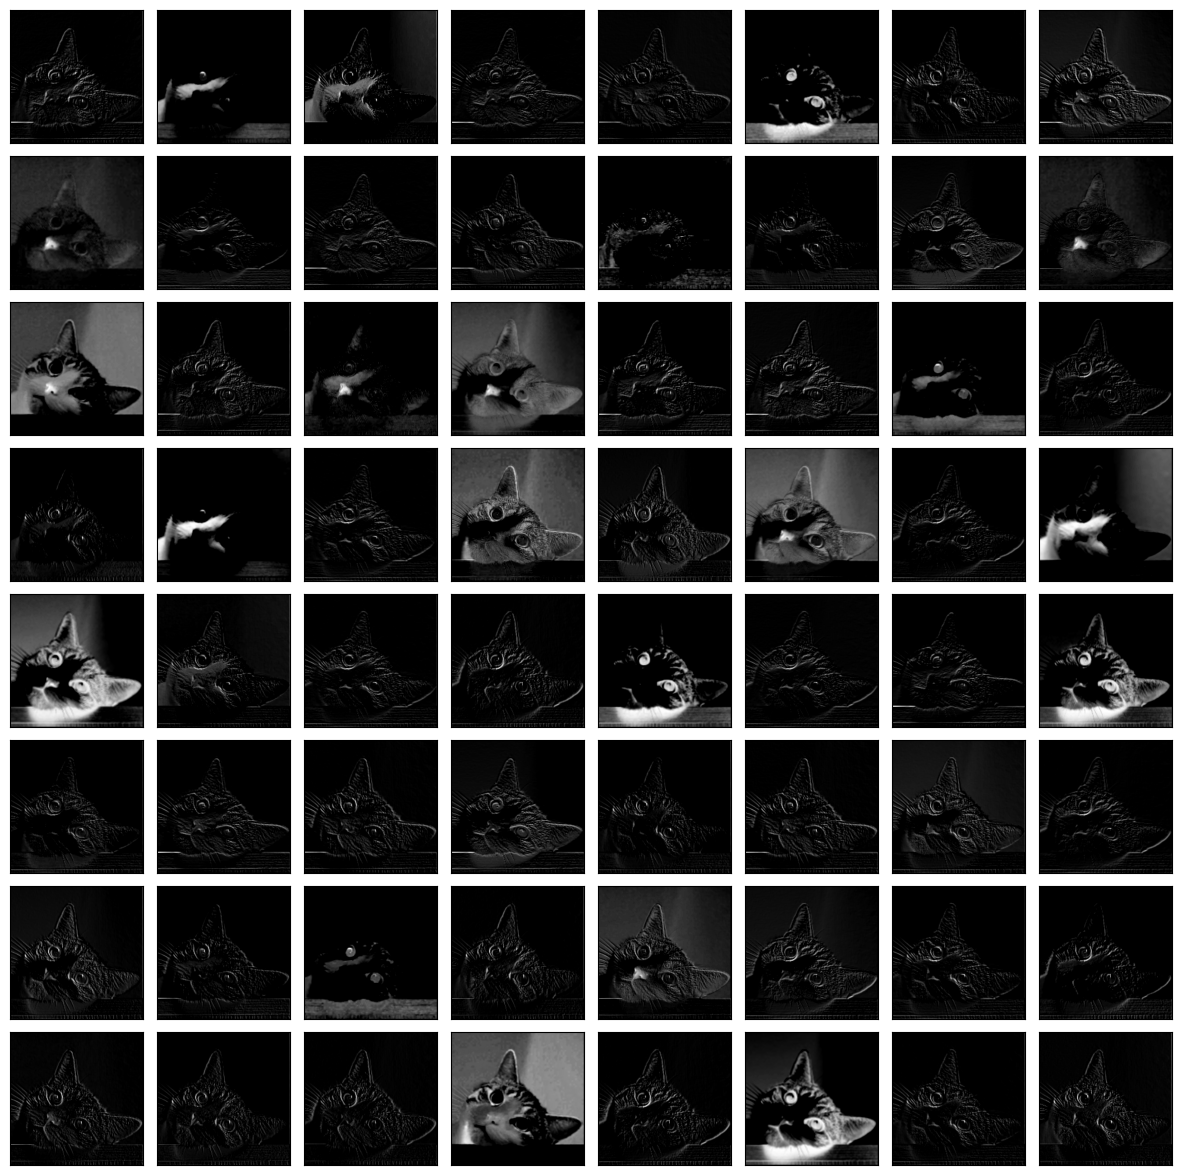

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import img_to_array
from numpy import expand_dims
from scipy import signal

model = VGG16(weights='imagenet', include_top=False)
model.summary()
kernal, bias = model.layers[1].get_weights()
model.layers[1].get_config()
# print("Kernal = {}".format(kernal))
# print("Bias = {}".format(bias))

img = cv2.imread('catto.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224, 224))
img = img_to_array(img)
img = expand_dims(img, axis=0)
img = preprocess_input(img)

first_conv_layer_model = Model(inputs=model.inputs, outputs=model.layers[1].output)
feature_maps = first_conv_layer_model.predict(img)

plt.imshow(feature_maps[0, :, :, 0], cmap='cool')

fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(15, 15),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(feature_maps[0, :, :, i], cmap='gray')

plt.show()